C:\Users\ssanj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\ssanj\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/200 | Discriminator Loss: 0.5047285556793213 | Generator Loss: 0.6544075012207031
Epoch 1/200 | Discriminator Loss: 0.5555187463760376 | Generator Loss: 0.6518590450286865
Epoch 2/200 | Discriminator Loss: 0.5658326148986816 | Generator Loss: 0.6512598991394043
Epoch 3/200 | Discriminator Loss: 0.5681736469268799 | Generator Loss: 0.6540477275848389
Epoch 4/200 | Discriminator Loss: 0.5706112384796143 | Generator Loss: 0.6484515070915222
Epoch 5/200 | Discriminator Loss: 0.5718121528625488 | Generator Loss: 0.644167959690094
Epoch 6/200 | Discriminator Loss: 0.5731066465377808 | Generator Loss: 0.645020604133606
Epoch 7/200 | Discriminator Loss: 0.5768908858299255 | Generator Loss: 0.6454107761383057
Epoch 8/200 | Discriminator Loss: 0.5786544680595398 | Generator Loss: 0.6449951529502869
Epoch 9/200 | Discriminator Loss: 0.5807681083679199 | Generator Loss: 0.6442127227783203
Epoch 10/200 | Discriminator Loss: 0.5823036432266235 | Generator Loss: 0.6469871401786804
Epoch 11/20

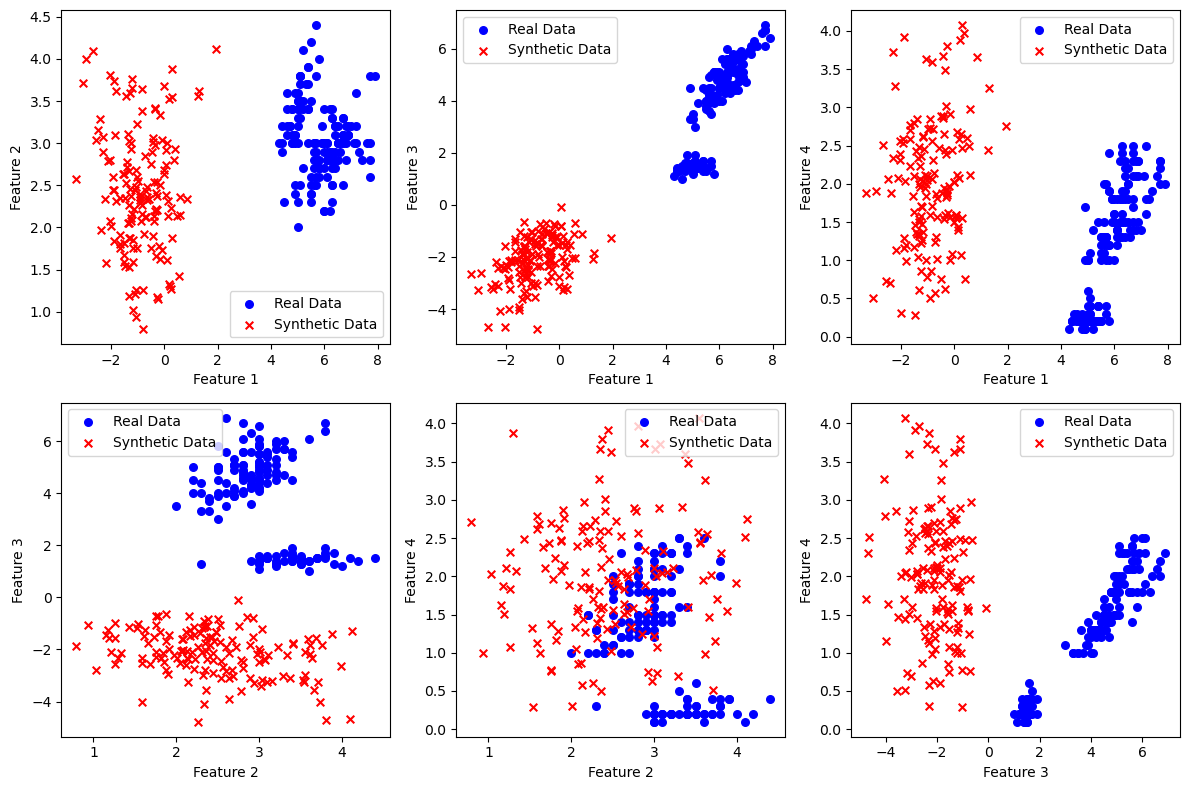

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
x_train = iris.data

def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear')) # Output 4 features
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),
metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

epochs = 200
batch_size = 16

for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} | Generator Loss: {g_loss}")

synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

plt.figure(figsize=(12, 8))
plot_idx = 1

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x',s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()